In [1]:
import json
import numpy as np
with open("/home/logicrays/Desktop/botpress/files/shapy/contour_data.json") as f:
    data = json.load(f)

arr = np.array(data["array"], dtype=np.uint8)

KeyError: 'array'

In [120]:
cont = data['contours'][7]#[42:67]
cont  = np.array(cont, dtype=np.int32)
# cont[40:59]

In [10]:
data['contours'][7][38:59]

[[[253, 204]],
 [[252, 205]],
 [[251, 205]],
 [[250, 206]],
 [[243, 206]],
 [[241, 204]],
 [[241, 183]],
 [[242, 182]],
 [[242, 160]],
 [[241, 159]],
 [[241, 129]],
 [[242, 128]],
 [[242, 111]],
 [[241, 110]],
 [[241, 103]],
 [[242, 102]],
 [[242, 85]],
 [[243, 84]],
 [[242, 85]],
 [[242, 102]],
 [[241, 103]]]

In [176]:
import json
import numpy as np
with open("/home/logicrays/Desktop/botpress/files/shapy/contour_data.json") as f:
    data = json.load(f)

# arr = np.array(data["contours"], dtype=np.uint8)

In [ ]:
import numpy as np
import math

def clean_rectangular_polyline(
    points,
    window_size=5,
    min_segment_len=5,
    snap_angle_threshold=15  # degrees
):
    """
    points: (N,2) numpy array
    returns: cleaned (M,2) numpy array
    """

    pts = np.array(points, dtype=np.float32)

    # -------------------------------------------------
    # STEP 1 — Sliding window smoothing
    # -------------------------------------------------
    smoothed = []
    half = window_size // 2

    for i in range(len(pts)):
        start = max(0, i - half)
        end = min(len(pts), i + half + 1)
        smoothed.append(np.mean(pts[start:end], axis=0))

    smoothed = np.array(smoothed)

    # -------------------------------------------------
    # STEP 2 — Snap near-horizontal / vertical
    # -------------------------------------------------
    snapped = [smoothed[0]]

    for i in range(1, len(smoothed)):
        x1, y1 = snapped[-1]
        x2, y2 = smoothed[i]

        dx = x2 - x1
        dy = y2 - y1

        angle = abs(math.degrees(math.atan2(dy, dx)))

        # horizontal snap
        if angle < snap_angle_threshold or angle > 180 - snap_angle_threshold:
            y2 = y1

        # vertical snap
        elif abs(angle - 90) < snap_angle_threshold:
            x2 = x1

        snapped.append([x2, y2])

    snapped = np.array(snapped)

    # -------------------------------------------------
    # STEP 3 — Remove very small segments
    # -------------------------------------------------
    cleaned = [snapped[0]]

    for i in range(1, len(snapped)):
        dist = np.linalg.norm(snapped[i] - cleaned[-1])
        if dist >= min_segment_len:
            cleaned.append(snapped[i])

    cleaned = np.array(cleaned)

    return cleaned.astype(np.int32)

[[[243, 206]],
 [[241, 204]],
 [[241, 183]],
 [[242, 182]],
 [[242, 160]],
 [[241, 159]],
 [[241, 129]],
 [[242, 128]],
 [[242, 111]],
 [[241, 110]],
 [[241, 103]],
 [[242, 102]],
 [[242, 85]],
 [[243, 84]],
 [[242, 85]],
 [[242, 102]],
 [[241, 103]],
 [[241, 110]],
 [[242, 111]],
 [[242, 128]],
 [[241, 129]],
 [[189, 129]],
 [[188, 128]],
 [[188, 40]],
 [[189, 39]]]

➡ x: [190 188 188 187  92  91  91  92 124 125 126 125 124  92  91  91  92 108
  92  91  91  92 187 188 188 186 187 240 241 241 242 242 241 241 243 250
 251 252 253 252 251 250 243 241 241 242 242 241 241 242 242 241 241 242
 242 243 242 242 241 241 242 242 241 189 188 188 189 211 189 188 188 190
 241 242 242 241 241 241 242 242 243 275 243 242 242 243 383 384 384 383
 357 383 384 384 383 291 290 291 383 384 385 386 385 384 384 385 408 385
 384 384 385 528 529 529 528 446 528 529 529 528 528 528 529 529 528 529
 529 528 242 241]


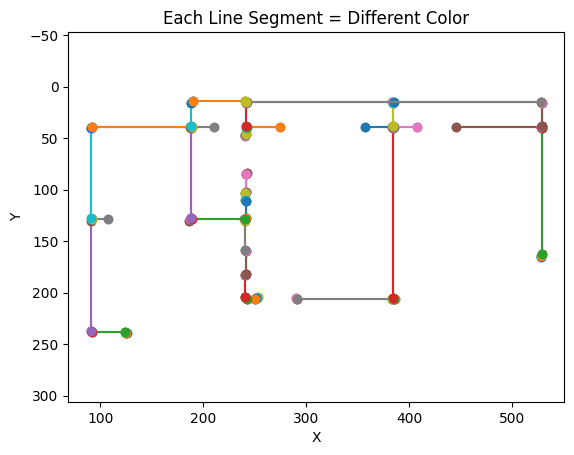

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# # Given contour
contour = np.array([[[190, 14]], [[188, 16]], [[188, 38]], [[187, 39]], [[92, 39]], [[91, 40]], [[91, 237]], [[92, 238]], [[124, 238]], [[125, 239]], [[126, 239]], [[125, 239]], [[124, 238]], [[92, 238]], [[91, 237]], [[91, 130]], [[92, 129]], [[108, 129]], [[92, 129]], [[91, 128]], [[91, 40]], [[92, 39]], [[187, 39]], [[188, 40]], [[188, 128]], [[186, 130]], [[187, 129]], [[240, 129]], [[241, 130]], [[241, 159]], [[242, 160]], [[242, 182]], [[241, 183]], [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]], [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]], [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]], [[242, 102]], [[242, 85]], [[243, 84]], [[242, 85]], [[242, 102]], [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]], [[189, 129]], [[188, 128]], [[188, 40]], [[189, 39]], [[211, 39]], [[189, 39]], [[188, 38]], [[188, 16]], [[190, 14]], [[241, 14]], [[242, 15]], [[242, 46]], [[241, 47]], [[241, 48]], [[241, 47]], [[242, 46]], [[242, 40]], [[243, 39]], [[275, 39]], [[243, 39]], [[242, 38]], [[242, 16]], [[243, 15]], [[383, 15]], [[384, 16]], [[384, 38]], [[383, 39]], [[357, 39]], [[383, 39]], [[384, 40]], [[384, 205]], [[383, 206]], [[291, 206]], [[290, 205]], [[291, 206]], [[383, 206]], [[384, 205]], [[385, 206]], [[386, 206]], [[385, 206]], [[384, 205]], [[384, 40]], [[385, 39]], [[408, 39]], [[385, 39]], [[384, 38]], [[384, 16]], [[385, 15]], [[528, 15]], [[529, 16]], [[529, 38]], [[528, 39]], [[446, 39]], [[528, 39]], [[529, 40]], [[529, 163]], [[528, 164]], [[528, 165]], [[528, 164]], [[529, 163]], [[529, 40]], [[528, 39]], [[529, 38]], [[529, 16]], [[528, 15]], [[242, 15]], [[241, 14]]], dtype=np.int32)
# contour = np.array(data['contours'][3], dtype=np.int32)

# Remove extra dimension -> (N, 2)
points = contour.reshape(-1, 2)

x = points[:, 0]
print('➡ x:', x)
y = points[:, 1]

# plt.figure()
# plt.plot(x, y, '-o')   # line + points
# plt.gca().invert_yaxis()  # important for image coordinates
# plt.axis('equal')
# plt.title("Contour Plot")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.show()


###################
import numpy as np
import matplotlib.pyplot as plt

points = contour.reshape(-1, 2)

plt.figure()

for i in range(len(points) - 1):
    x = [points[i, 0], points[i + 1, 0]]
    y = [points[i, 1], points[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [48]:
import numpy as np
import matplotlib.pyplot as plt

points = con#tour.reshape(-1, 2)

plt.figure()

for idx in range(81):#(len(points) - 1):
    x1, y1 = points[idx]
    x2, y2 = points[idx + 1]

    # Draw segment (auto color)
    plt.plot([x1, x2], [y1, y2], '-o')

    # Midpoint of the line
    mx = (x1 + x2) / 2
    my = (y1 + y2) / 2

    # Print line number
    plt.text(
        mx, my,
        str(idx + 1),
        color="black",
        fontsize=9,
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
    )

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Line Segments with Index Numbers")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

NameError: name 'con' is not defined

In [110]:
con[39:60]

array([[243, 206],
       [241, 204],
       [241, 183],
       [242, 182],
       [242, 160],
       [241, 159],
       [241, 129],
       [242, 128],
       [242, 111],
       [241, 110],
       [241, 103],
       [242, 102],
       [242,  85],
       [242,  85],
       [242, 102],
       [241, 103],
       [241, 110],
       [242, 111],
       [242, 128],
       [241, 129],
       [189, 129]], dtype=int32)

In [18]:
import numpy as np

# contour shape: (N, 1, 2)
points = contour.reshape(-1, 2)   # -> (N, 2)

# sort by X value
sorted_points = points[np.argsort(points[:, 0])]

# (optional) convert back to contour shape
sorted_contour = sorted_points.reshape(-1, 1, 2)

# print(sorted_contour[3:23])

In [94]:
import numpy as np
import math



def clean_polyline(
    points,
    min_segment_len=3.0,     # remove tiny connections (px)
    angle_threshold=10.0     # degrees, for collinearity
):
    """
    points: (N,2) numpy array
    returns: cleaned (M,2) numpy array
    """

    def dist(p1, p2):
        return math.hypot(p2[0] - p1[0], p2[1] - p1[1])

    def angle(p0, p1, p2):
        v1 = p0 - p1
        v2 = p2 - p1
        dot = np.dot(v1, v2)
        n = np.linalg.norm(v1) * np.linalg.norm(v2)
        if n == 0:
            return 0
        return math.degrees(math.acos(np.clip(dot / n, -1, 1)))

    # ---- STEP 1: remove very small segments
    filtered = [points[0]]
    for p in points[1:]:
        if dist(filtered[-1], p) >= min_segment_len:
            filtered.append(p)
    filtered = np.array(filtered)

    # ---- STEP 2: remove A -> B -> A oscillations
    stable = [filtered[0]]
    for i in range(1, len(filtered) - 1):
        prev = stable[-1]
        curr = filtered[i]
        nxt = filtered[i + 1]

        if dist(prev, nxt) < min_segment_len:
            continue  # skip jitter
        stable.append(curr)

    stable.append(filtered[-1])
    stable = np.array(stable)

    # ---- STEP 3: remove nearly collinear middle points
    final = [stable[0]]
    for i in range(1, len(stable) - 1):
        a = final[-1]
        b = stable[i]
        c = stable[i + 1]

        ang = angle(a, b, c)
        if abs(ang - 180) < angle_threshold:
            print('yyy')
            print('➡ ang:', ang)
            continue  # b is unnecessary
        final.append(b)

    final.append(stable[-1])
    return np.array(final)

In [111]:
con = clean_polyline(points,min_segment_len=2.0, angle_threshold=3.0)
print(len(con))

yyy
➡ ang: 179.46949868332584
yyy
➡ ang: 179.4791436254986
yyy
➡ ang: 179.41959951099795
yyy
➡ ang: 177.51044707800088
yyy
➡ ang: 179.35625428582472
yyy
➡ ang: 179.3704013915899
yyy
➡ ang: 180.0
yyy
➡ ang: 180.0
yyy
➡ ang: 177.51044707800088
yyy
➡ ang: 177.7093899573614
yyy
➡ ang: 179.6548488768354
yyy
➡ ang: 179.6589577211411
yyy
➡ ang: 177.51044707800088
yyy
➡ ang: 180.0
40


➡ poin: [[188  14]
 [188  39]
 [ 92  39]
 [ 92 238]
 [124 238]
 [ 92 238]
 [ 92 129]
 [108 129]
 [ 92 129]
 [ 92  39]
 [187  39]
 [187 129]
 [241 129]
 [241 206]
 [250 206]
 [250 205]
 [253 204]
 [253 205]
 [250 206]
 [242 206]
 [242 129]
 [189 129]
 [189  39]
 [211  39]
 [188  39]
 [188  14]
 [241  14]
 [241  39]
 [275  39]
 [243  39]
 [243  15]
 [383  15]
 [383  39]
 [357  39]
 [383  39]
 [383 206]
 [291 206]
 [383 206]
 [385 206]
 [385  39]
 [408  39]
 [385  39]
 [385  15]
 [528  15]
 [528  39]
 [446  39]
 [528  39]
 [528  15]
 [242  15]
 [241  14]]
➡ x: [188 188  92  92 124  92  92 108  92  92 187 187 241 241 250 250 253 253
 250 242 242 189 189 211 188 188 241 241 275 243 243 383 383 357 383 383
 291 383 385 385 408 385 385 528 528 446 528 528 242 241]


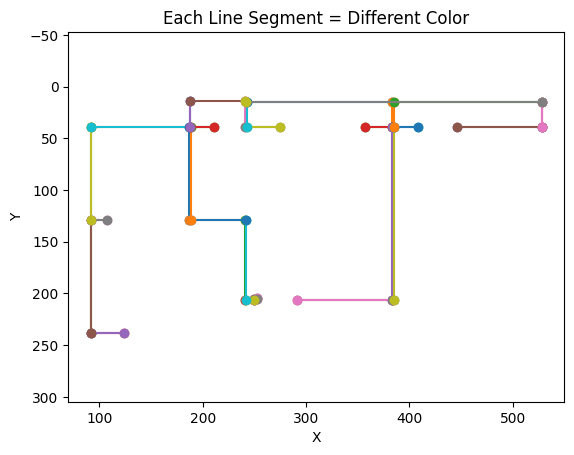

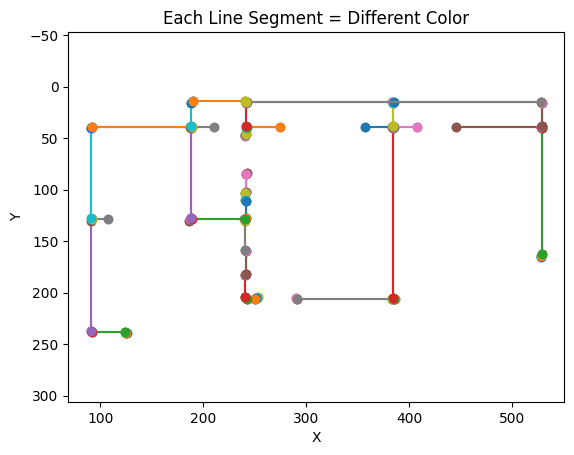

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# # Given contour
contour = np.array([[[190, 14]], [[188, 16]], [[188, 38]], [[187, 39]], [[92, 39]], [[91, 40]], [[91, 237]], [[92, 238]], [[124, 238]], [[125, 239]], [[126, 239]], [[125, 239]], [[124, 238]], [[92, 238]], [[91, 237]], [[91, 130]], [[92, 129]], [[108, 129]], [[92, 129]], [[91, 128]], [[91, 40]], [[92, 39]], [[187, 39]], [[188, 40]], [[188, 128]], [[186, 130]], [[187, 129]], [[240, 129]], [[241, 130]], [[241, 159]], [[242, 160]], [[242, 182]], [[241, 183]], [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]], [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]], [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]], [[242, 102]], [[242, 85]], [[243, 84]], [[242, 85]], [[242, 102]], [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]], [[189, 129]], [[188, 128]], [[188, 40]], [[189, 39]], [[211, 39]], [[189, 39]], [[188, 38]], [[188, 16]], [[190, 14]], [[241, 14]], [[242, 15]], [[242, 46]], [[241, 47]], [[241, 48]], [[241, 47]], [[242, 46]], [[242, 40]], [[243, 39]], [[275, 39]], [[243, 39]], [[242, 38]], [[242, 16]], [[243, 15]], [[383, 15]], [[384, 16]], [[384, 38]], [[383, 39]], [[357, 39]], [[383, 39]], [[384, 40]], [[384, 205]], [[383, 206]], [[291, 206]], [[290, 205]], [[291, 206]], [[383, 206]], [[384, 205]], [[385, 206]], [[386, 206]], [[385, 206]], [[384, 205]], [[384, 40]], [[385, 39]], [[408, 39]], [[385, 39]], [[384, 38]], [[384, 16]], [[385, 15]], [[528, 15]], [[529, 16]], [[529, 38]], [[528, 39]], [[446, 39]], [[528, 39]], [[529, 40]], [[529, 163]], [[528, 164]], [[528, 165]], [[528, 164]], [[529, 163]], [[529, 40]], [[528, 39]], [[529, 38]], [[529, 16]], [[528, 15]], [[242, 15]], [[241, 14]]], dtype=np.int32)


# contour = np.array(data['contours'][3], dtype=np.int32)

# Remove extra dimension -> (N, 2)
poin = result#con#raw
print('➡ poin:', poin)
#con#tour.reshape(-1, 2)

x = poin[:, 0]
print('➡ x:', x)
y = poin[:, 1]

plt.figure()

for i in range(len(poin) - 1):
    x = [poin[i, 0], poin[i + 1, 0]]
    y = [poin[i, 1], poin[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# ###################
# import numpy as np
# import matplotlib.pyplot as plt

point = contour.reshape(-1, 2)

plt.figure()

for i in range(len(point) - 1):
    x = [point[i, 0], point[i + 1, 0]]
    y = [point[i, 1], point[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [61]:
import numpy as np


def clean_contour(points, error_rate=3, min_segment_length=5):
    """
    Cleans a contour/polyline by:
    1. Removing duplicate and near-duplicate points (within error_rate distance)
    2. Removing small back-and-forth oscillations (noise spikes)
    3. Merging redundant collinear segments into single clean lines

    Args:
        points     : list of [[x, y]] or [[x, y]] nested lists (raw contour data)
        error_rate : pixel tolerance — points within this distance are considered the same (default: 3)
        min_segment_length: minimum pixel length a segment must be to keep (default: 5)

    Returns:
        List of [x, y] cleaned unique points forming a single clean connection
    """

    # --- Step 1: Flatten to list of [x, y] ---
    flat = []
    for p in points:
        # Handle [[x, y]] or [x, y]
        if isinstance(p[0], (list, tuple)):
            flat.append(list(p[0]))
        else:
            flat.append(list(p))

    if len(flat) == 0:
        return []

    # --- Step 2: Remove consecutive duplicates within error_rate tolerance ---
    def dist(a, b):
        return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

    deduped = [flat[0]]
    for pt in flat[1:]:
        if dist(pt, deduped[-1]) > error_rate:
            deduped.append(pt)

    if len(deduped) < 2:
        return deduped

    # --- Step 3: Remove oscillation / back-and-forth spikes ---
    # If point[i] is very close to point[i-2], the middle point is a spike — remove it
    def remove_spikes(pts, tolerance):
        changed = True
        while changed:
            changed = False
            result = [pts[0]]
            i = 1
            while i < len(pts) - 1:
                # Check if we're about to go back where we came from
                if dist(pts[i + 1], result[-1]) < tolerance:
                    # Skip pts[i] and pts[i+1] — they're a spike
                    i += 2
                    changed = True
                else:
                    result.append(pts[i])
                    i += 1
            if i < len(pts):
                result.append(pts[i])
            pts = result
        return pts

    no_spikes = remove_spikes(deduped, error_rate * 2)

    # --- Step 4: Douglas-Peucker simplification to remove redundant collinear points ---
    def point_line_distance(point, start, end):
        """Perpendicular distance from point to line segment start->end."""
        if start == end:
            return dist(point, start)
        x0, y0 = point
        x1, y1 = start
        x2, y2 = end
        num = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        den = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        return num / den if den != 0 else 0

    def douglas_peucker(pts, epsilon):
        if len(pts) < 3:
            return pts
        # Find the point with the maximum distance from the line start->end
        dmax = 0
        index = 0
        for i in range(1, len(pts) - 1):
            d = point_line_distance(pts[i], pts[0], pts[-1])
            if d > dmax:
                dmax = d
                index = i

        if dmax > epsilon:
            # Recursively simplify both halves
            left  = douglas_peucker(pts[:index + 1], epsilon)
            right = douglas_peucker(pts[index:], epsilon)
            return left[:-1] + right
        else:
            # All intermediate points are within tolerance — collapse to endpoints only
            return [pts[0], pts[-1]]

    simplified = douglas_peucker(no_spikes, error_rate)

    # --- Step 5: Remove any remaining short segments ---
    final = [simplified[0]]
    for pt in simplified[1:]:
        if dist(pt, final[-1]) >= min_segment_length:
            final.append(pt)
        else:
            # Replace with midpoint to avoid losing the endpoint
            final[-1] = pt  # just advance — keeps the further point

    return final


# # ── Example usage ──────────────────────────────────────────────────────────────
# if __name__ == "__main__":
#     raw = [
#         [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]],
#         [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]],
#         [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]],
#         [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]],
#         [[242, 102]], [[242, 85]],  [[243, 84]],  [[242, 85]],  [[242, 102]],
#         [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]],
#         [[189, 129]],
#     ]



In [87]:
raw = clean_contour(points, error_rate=0.1, min_segment_length=1)
print(len(raw))

# print(f"Original points : {len(raw)}")
# print(f"Cleaned points  : {len(cleaned)}")
# print("\nCleaned contour:")
# # for p in cleaned:
# #     print(f"  {p}")

48


In [88]:
raw = np.array(raw, dtype=np.int32)

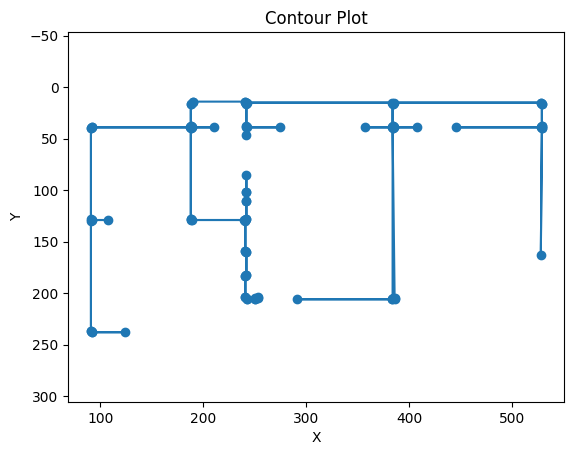

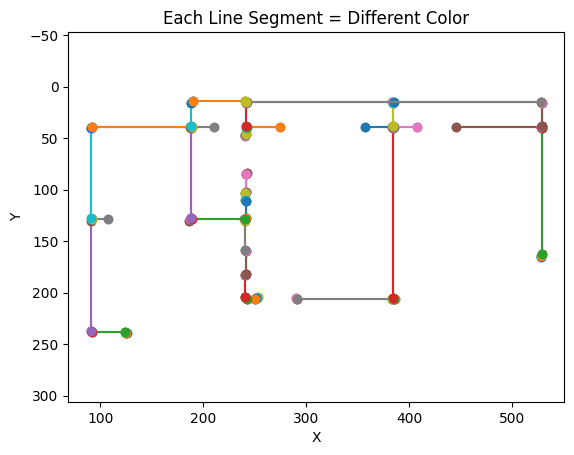

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# # Given contour
# contour = np.array([[[190, 14]], [[188, 16]], [[188, 38]], [[187, 39]], [[92, 39]], [[91, 40]], [[91, 237]], [[92, 238]], [[124, 238]], [[125, 239]], [[126, 239]], [[125, 239]], [[124, 238]], [[92, 238]], [[91, 237]], [[91, 130]], [[92, 129]], [[108, 129]], [[92, 129]], [[91, 128]], [[91, 40]], [[92, 39]], [[187, 39]], [[188, 40]], [[188, 128]], [[186, 130]], [[187, 129]], [[240, 129]], [[241, 130]], [[241, 159]], [[242, 160]], [[242, 182]], [[241, 183]], [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]], [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]], [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]], [[242, 102]], [[242, 85]], [[243, 84]], [[242, 85]], [[242, 102]], [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]], [[189, 129]], [[188, 128]], [[188, 40]], [[189, 39]], [[211, 39]], [[189, 39]], [[188, 38]], [[188, 16]], [[190, 14]], [[241, 14]], [[242, 15]], [[242, 46]], [[241, 47]], [[241, 48]], [[241, 47]], [[242, 46]], [[242, 40]], [[243, 39]], [[275, 39]], [[243, 39]], [[242, 38]], [[242, 16]], [[243, 15]], [[383, 15]], [[384, 16]], [[384, 38]], [[383, 39]], [[357, 39]], [[383, 39]], [[384, 40]], [[384, 205]], [[383, 206]], [[291, 206]], [[290, 205]], [[291, 206]], [[383, 206]], [[384, 205]], [[385, 206]], [[386, 206]], [[385, 206]], [[384, 205]], [[384, 40]], [[385, 39]], [[408, 39]], [[385, 39]], [[384, 38]], [[384, 16]], [[385, 15]], [[528, 15]], [[529, 16]], [[529, 38]], [[528, 39]], [[446, 39]], [[528, 39]], [[529, 40]], [[529, 163]], [[528, 164]], [[528, 165]], [[528, 164]], [[529, 163]], [[529, 40]], [[528, 39]], [[529, 38]], [[529, 16]], [[528, 15]], [[242, 15]], [[241, 14]]], dtype=np.int32)


contour = np.array(data['contours'][7], dtype=np.int32)

# Remove extra dimension -> (N, 2)
poin = result
#con#tour.reshape(-1, 2)

x = poin[:, 0]

y = poin[:, 1]

plt.figure()
plt.plot(x, y, '-o')   # line + poin
plt.gca().invert_yaxis()  # important for image coordinates
plt.axis('equal')
plt.title("Contour Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# ###################
# import numpy as np
# import matplotlib.pyplot as plt

point = contour.reshape(-1, 2)

plt.figure()

for i in range(len(point) - 1):
    x = [point[i, 0], point[i + 1, 0]]
    y = [point[i, 1], point[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [5]:
len(cont)

130

In [70]:
import numpy as np
import math

def clean_rectangular_polyline(
    points,
    window_size=5,
    min_segment_len=5,
    snap_angle_threshold=15  # degrees
):
    """
    points: (N,2) numpy array
    returns: cleaned (M,2) numpy array
    """

    pts = np.array(points, dtype=np.float32)

    # -------------------------------------------------
    # STEP 1 — Sliding window smoothing
    # -------------------------------------------------
    smoothed = []
    half = window_size // 2

    for i in range(len(pts)):
        start = max(0, i - half)
        end = min(len(pts), i + half + 1)
        smoothed.append(np.mean(pts[start:end], axis=0))

    smoothed = np.array(smoothed)

    # -------------------------------------------------
    # STEP 2 — Snap near-horizontal / vertical
    # -------------------------------------------------
    snapped = [smoothed[0]]

    for i in range(1, len(smoothed)):
        x1, y1 = snapped[-1]
        x2, y2 = smoothed[i]

        dx = x2 - x1
        dy = y2 - y1

        angle = abs(math.degrees(math.atan2(dy, dx)))

        # horizontal snap
        if angle < snap_angle_threshold or angle > 180 - snap_angle_threshold:
            y2 = y1

        # vertical snap
        elif abs(angle - 90) < snap_angle_threshold:
            x2 = x1

        snapped.append([x2, y2])

    snapped = np.array(snapped)

    # -------------------------------------------------
    # STEP 3 — Remove very small segments
    # -------------------------------------------------
    cleaned = [snapped[0]]

    for i in range(1, len(snapped)):
        dist = np.linalg.norm(snapped[i] - cleaned[-1])
        if dist >= min_segment_len:
            cleaned.append(snapped[i])

    cleaned = np.array(cleaned)

    return cleaned.astype(np.int32)

In [33]:
import numpy as np

def clean_repetitive_contour(points, median_region=241, threshold=2, window_size=3):
    """
    Clean repetitive zigzag patterns in contour data.
    
    Parameters:
    -----------
    points : ndarray
        Array of shape (N, 2) containing [x, y] coordinates
    median_region : int or float
        The approximate x-coordinate median/center around which to clean
    threshold : int or float
        Maximum allowed x-coordinate difference from median for points to be considered part of the parallel lines
    window_size : int
        Size of sliding window to detect direction changes
    
    Returns:
    --------
    cleaned_points : ndarray
        Cleaned array of points with repetitive zigzag removed
    """
    
    # Step 1: Sort points by x-coordinate
    sorted_indices = np.argsort(points[:, 0])
    sorted_points = points[sorted_indices]
    # print('➡ sorted_points:', sorted_points)
    
    # Step 2: Identify points near the median region (where zigzag occurs)
    x_coords = sorted_points[:, 0]
    near_median = np.abs(x_coords - median_region) <= threshold
    
    # Step 3: Process points using sliding window
    cleaned = []
    i = 0
    
    while i < len(sorted_points):
        # Check if current point is in the problematic region
        if near_median[i]:
            # Look ahead to find all consecutive points in this region
            j = i
            print('➡ j:', j)
            while j < len(sorted_points) and near_median[j]:
                j += 1
            
            # Extract this segment
            segment = sorted_points[i:j]
            
            # For this segment, keep only the median trajectory
            # Group by direction and keep representative points
            if len(segment) > 0:
                # Calculate median x for this segment
                median_x = np.median(segment[:, 0])
                
                # Keep the point closest to median x for each unique y region
                unique_ys = []
                for point in segment:
                    # Check if this y-value is significantly different from existing ones
                    is_new = True
                    for existing_y in unique_ys:
                        if abs(point[1] - existing_y) < 5:  # tolerance for y-values
                            is_new = False
                            break
                    
                    if is_new:
                        unique_ys.append(point[1])
                        # Add point with median x-coordinate
                        cleaned.append([median_x, point[1]])
            
            i = j
        else:
            # Keep points outside the problematic region as-is
            cleaned.append(sorted_points[i])
            i += 1
    
    return np.array(cleaned, dtype=points.dtype)


def clean_repetitive_contour_simple(points, x_threshold=2):
    """
    Simplified version: removes points that create back-and-forth patterns in x-direction.
    
    Parameters:
    -----------
    points : ndarray
        Array of shape (N, 2) containing [x, y] coordinates
    x_threshold : int or float
        Maximum x-coordinate variation to consider as "parallel/repetitive"
    
    Returns:
    --------
    cleaned_points : ndarray
        Cleaned array of points
    """
    if len(points) < 3:
        return points
    
    cleaned = [points[0]]
    
    for i in range(1, len(points) - 1):
        prev_point = cleaned[-1]
        curr_point = points[i]
        next_point = points[i + 1]
        
        # Calculate direction changes
        dx1 = curr_point[0] - prev_point[0]
        dx2 = next_point[0] - curr_point[0]
        
        # Check if this creates a back-and-forth pattern with small x-variation
        if abs(dx1) <= x_threshold and abs(dx2) <= x_threshold and np.sign(dx1) != np.sign(dx2):
            # Skip this point - it's part of a zigzag
            continue
        
        cleaned.append(curr_point)
    
    # Always keep the last point
    cleaned.append(points[-1])
    
    return np.array(cleaned, dtype=points.dtype)


# Example usage:
if __name__ == "__main__":
    # Example data (from your notebook)
    sample_data = np.array([
        [243, 206], [241, 204], [241, 183], [242, 182],
        [242, 160], [241, 159], [241, 129], [242, 128],
        [242, 111], [241, 110], [241, 103], [242, 102],
        [242, 85], [243, 84], [242, 85], [242, 102],
        [241, 103], [241, 110], [242, 111], [242, 128]
    ])
    
    print("Original points:")
    print(f"\nNumber of points: {len(cont_points)}")
    
    # cleaned = clean_repetitive_contour_simple(cont_points, x_threshold=2)
    cleaned = clean_repetitive_contour(cont_points)

    print("\nCleaned points:")
    print(len(cleaned))
    print(f"\nNumber of points after cleaning: {len(cleaned)}")


Original points:

Number of points: 130
➡ j: 36

Cleaned points:
96

Number of points after cleaning: 96


In [36]:
cleaned[30:55]

array([[189, 129],
       [189,  39],
       [189,  39],
       [190,  14],
       [190,  14],
       [211,  39],
       [242, 129],
       [242, 103],
       [242, 204],
       [242, 110],
       [242, 183],
       [242, 159],
       [242,  47],
       [242,  14],
       [242,  85],
       [242,  38],
       [250, 206],
       [250, 206],
       [251, 205],
       [251, 205],
       [252, 205],
       [252, 205],
       [253, 204],
       [275,  39],
       [290, 205]], dtype=int32)

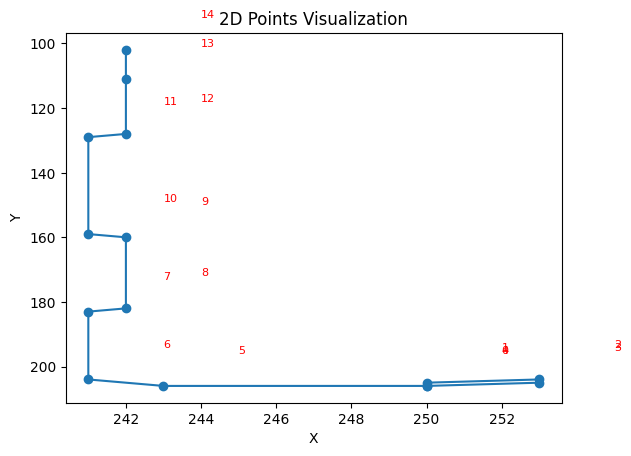

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your points
points = result[30:45]# result[20:50]#cleaned[30:55]

# Separate x and y
x = points[:, 0]
y = points[:, 1]

# Plot
plt.figure()
plt.scatter(x, y)

# Connect points in order (optional)
plt.plot(x, y)

# Invert Y-axis (useful if coordinates are image-based)
plt.gca().invert_yaxis()

# Label points (optional)
for i, (xi, yi) in enumerate(points):
    plt.text(
        xi + 2,          # shift right
        yi - 10,          # shift up (because inverted y-axis)
        str(i),
        fontsize=8,
        color="red"
    )
    

plt.title("2D Points Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [146]:
result[30:45]

array([[250, 206],
       [250, 205],
       [253, 204],
       [253, 205],
       [250, 206],
       [243, 206],
       [241, 204],
       [241, 183],
       [242, 182],
       [242, 160],
       [241, 159],
       [241, 129],
       [242, 128],
       [242, 111],
       [242, 102]], dtype=int32)

In [147]:
import numpy as np
from collections import Counter

def merge_lines_with_local_mode(contour, min_segment_length=3, tolerance=2):
    """
    Merge small line segments using LOCAL mode calculation for each segment.
    
    Parameters:
    -----------
    contour : numpy.ndarray
        Shape (n, 1, 2) containing [[x, y]] coordinates
    min_segment_length : int, default=3
        Minimum points needed to merge a segment
    tolerance : int, default=2
        Range around mode (mode ± tolerance) to include points
    
    Returns:
    --------
    numpy.ndarray
        Merged contour with shape (m, 1, 2) where m <= n
    """
    if len(contour) == 0:
        return contour
    
    points = contour.reshape(-1, 2)
    
    if len(points) <= 2:
        return contour
    
    merged_points = []
    i = 0
    
    while i < len(points):
        segment_start = i
        current_x_values = [points[i, 0]]
        j = i + 1
        
        # Build segment by collecting consecutive similar x-coordinates
        while j < len(points):
            # print('➡ j:', points[j, 0])
            x_coord = points[j, 0]
            
            # Once we have enough points, use LOCAL mode
            if len(current_x_values) >= min_segment_length:
                # Calculate mode from CURRENT segment only
                counter = Counter(current_x_values)
                # print('➡ counter:', counter)
                local_mode = counter.most_common(1)[0][0]
                
                # Check if next point fits within mode ± tolerance
                if abs(x_coord - local_mode) <= tolerance:
                    current_x_values.append(x_coord)
                    j += 1
                else:
                    break  # End this segment
            else:
                # Still building, be lenient
                if abs(x_coord - current_x_values[-1]) <= tolerance * 2:
                    current_x_values.append(x_coord)
                    j += 1
                else:
                    break
        
        segment_end = j
        segment_length = segment_end - segment_start
        
        # Merge if segment is long enough
        if segment_length >= min_segment_length:
            # Calculate FINAL mode for this segment
            counter = Counter(current_x_values)
            mode_x = counter.most_common(1)[0][0]
            print('➡ mode_x:', mode_x)
            
            # Keep only first and last y with mode x-coordinate
            first_y = points[segment_start, 1]
            print('➡ first_y:', first_y)
            last_y = points[segment_end - 1, 1]
            print('➡ last_y:', last_y)
            
            merged_points.append([mode_x, first_y])
            if first_y != last_y:
                merged_points.append([mode_x, last_y])
        else:
            # Too short, keep all points
            for k in range(segment_start, segment_end):
                merged_points.append(points[k])
        
        i = segment_end
    
    # Convert back to (n, 1, 2) shape
    merged_array = np.array(merged_points).reshape(-1, 1, 2)
    return merged_array


# ============ USAGE EXAMPLE ============

input_contour = np.array([
    [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]],
    [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]],
    [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]],
    [[241, 103]]
])

input_contour = np.array([
[[385  ,15]],
[[528  ,15]],
[[529  ,16]],
[[529  ,38]],
[[528  ,39]],
[[446  ,39]],
[[528  ,39]],
[[529  ,40]],
[[529 ,163]],
[[528 ,164]],
[[528 ,165]],
[[528 ,164]],
[[529 ,163]],
[[529  ,40]],
[[528  ,39]],
[[529  ,38]],
[[529  ,16]],
[[528  ,15]],
[[242  ,15]],
[[241  ,14]]
])


result = merge_lines_with_local_mode(cont, min_segment_length=3, tolerance=2)
print('➡ result:', len(result))
result = result.reshape(-1, 2)
print("Input:", len(input_contour))
print("Output:", len(result))
# Output: [[241, 206], [241, 103]]

➡ mode_x: 188
➡ first_y: 14
➡ last_y: 39
➡ mode_x: 92
➡ first_y: 39
➡ last_y: 238
➡ mode_x: 124
➡ first_y: 238
➡ last_y: 238
➡ mode_x: 92
➡ first_y: 238
➡ last_y: 129
➡ mode_x: 92
➡ first_y: 129
➡ last_y: 39
➡ mode_x: 187
➡ first_y: 39
➡ last_y: 129
➡ mode_x: 241
➡ first_y: 129
➡ last_y: 206
➡ mode_x: 250
➡ first_y: 206
➡ last_y: 205
➡ mode_x: 253
➡ first_y: 204
➡ last_y: 205
➡ mode_x: 242
➡ first_y: 206
➡ last_y: 129
➡ mode_x: 189
➡ first_y: 129
➡ last_y: 39
➡ mode_x: 188
➡ first_y: 39
➡ last_y: 14
➡ mode_x: 241
➡ first_y: 14
➡ last_y: 39
➡ mode_x: 243
➡ first_y: 39
➡ last_y: 15
➡ mode_x: 383
➡ first_y: 15
➡ last_y: 39
➡ mode_x: 383
➡ first_y: 39
➡ last_y: 206
➡ mode_x: 291
➡ first_y: 206
➡ last_y: 206
➡ mode_x: 383
➡ first_y: 206
➡ last_y: 206
➡ mode_x: 385
➡ first_y: 206
➡ last_y: 39
➡ mode_x: 385
➡ first_y: 39
➡ last_y: 15
➡ mode_x: 528
➡ first_y: 15
➡ last_y: 39
➡ mode_x: 528
➡ first_y: 39
➡ last_y: 15
➡ result: 50
Input: 20
Output: 50


In [ ]:
import numpy as np
from collections import Counter

def merge_lines_with_local_mode(contour, min_segment_length=3, tolerance=2, y_jump_threshold=15):
    """
    Merge small line segments using LOCAL mode calculation per segment.
    
    NEW FIX: Detects large y-jumps as separate line boundaries.
    Even if x is within tolerance, a large y gap = new segment.
    
    Parameters:
    -----------
    contour : numpy.ndarray         Shape (n, 1, 2)
    min_segment_length : int        Min points to trigger a merge
    tolerance : int                 x must be within mode ± tolerance
    y_jump_threshold : int          y difference that signals a NEW line (default=20)
    """
    if len(contour) == 0:
        return contour

    points = contour.reshape(-1, 2)

    if len(points) <= 2:
        return contour

    merged_points = []
    i = 0

    while i < len(points):
        segment_start = i
        current_x_values = [points[i, 0]]
        j = i + 1

        while j < len(points):
            x_coord = points[j, 0]
            y_coord = points[j, 1]
            prev_y  = points[j - 1, 1]

            #── NEW: large y-jump = separate line, stop segment here ──
            if abs(y_coord - prev_y) > y_jump_threshold:
                # print(y_coord,'➡ y_coord:', prev_y )
                break

            if len(current_x_values) >= min_segment_length:
                counter    = Counter(current_x_values)
                local_mode = counter.most_common(1)[0][0]

                if abs(x_coord - local_mode) <= tolerance:
                    current_x_values.append(x_coord)
                    j += 1
                else:
                    break
            else:
                if abs(x_coord - current_x_values[-1]) <= tolerance * 2:
                    current_x_values.append(x_coord)
                    j += 1
                else:
                    break

        segment_end    = j
        segment_length = segment_end - segment_start

        if segment_length >= min_segment_length:
            counter = Counter(current_x_values)
            mode_x  = counter.most_common(1)[0][0]

            first_y = points[segment_start, 1]
            last_y  = points[segment_end - 1, 1]

            merged_points.append([mode_x, first_y])
            if first_y != last_y:
                merged_points.append([mode_x, last_y])
        else:
            for k in range(segment_start, segment_end):
                merged_points.append(points[k])

        i = segment_end

    return np.array(merged_points).reshape(-1, 1, 2)

result = merge_lines_with_local_mode(cont, min_segment_length=3, tolerance=2)
print('➡ result:', len(result))
result = result.reshape(-1, 2)
print("Input:", len(cont))
print("Output:", len(result))

➡ result: 50
Input: 130
Output: 50


In [157]:
import numpy as np
from collections import Counter

def merge_lines_with_local_mode(contour, min_segment_length=3, tolerance=2, y_jump_threshold=25):
    """
    Merge small line segments using LOCAL mode calculation per segment.
    
    NEW FIX: Detects large y-jumps as separate line boundaries.
    Even if x is within tolerance, a large y gap = new segment.
    
    Parameters:
    -----------
    contour : numpy.ndarray         Shape (n, 1, 2)
    min_segment_length : int        Min points to trigger a merge
    tolerance : int                 x must be within mode ± tolerance
    y_jump_threshold : int          y difference that signals a NEW line (default=20)
    """
    if len(contour) == 0:
        return contour

    points = contour.reshape(-1, 2)

    if len(points) <= 2:
        return contour

    merged_points = []
    i = 0

    while i < len(points):
        segment_start = i
        current_x_values = [points[i, 0]]
        j = i + 1

        while j < len(points):
            x_coord = points[j, 0]
            y_coord = points[j, 1]
            prev_y  = points[j - 1, 1]

            #── NEW: large y-jump = separate line, stop segment here ──
            if abs(y_coord - prev_y) > y_jump_threshold:
                # print(y_coord,'➡ y_coord:', prev_y )
                break

            if len(current_x_values) >= min_segment_length:
                counter    = Counter(current_x_values)
                local_mode = counter.most_common(1)[0][0]

                if abs(x_coord - local_mode) <= tolerance:
                    current_x_values.append(x_coord)
                    j += 1
                else:
                    break
            else:
                if abs(x_coord - current_x_values[-1]) <= tolerance * 2:
                    current_x_values.append(x_coord)
                    j += 1
                else:
                    break

        segment_end    = j
        segment_length = segment_end - segment_start

        if segment_length >= min_segment_length:
            counter = Counter(current_x_values)
            mode_x  = counter.most_common(1)[0][0]

            first_y = points[segment_start, 1]
            last_y  = points[segment_end - 1, 1]

            merged_points.append([mode_x, first_y])
            if first_y != last_y:
                merged_points.append([mode_x, last_y])
        else:
            for k in range(segment_start, segment_end):
                merged_points.append(points[k])

        i = segment_end

    return np.array(merged_points).reshape(-1, 1, 2)

result = merge_lines_with_local_mode(cont, min_segment_length=3, tolerance=2)
print('➡ result:', len(result))
result = result.reshape(-1, 2)
print("Input:", len(cont))
print("Output:", len(result))

➡ result: 72
Input: 130
Output: 72


➡ result: 94


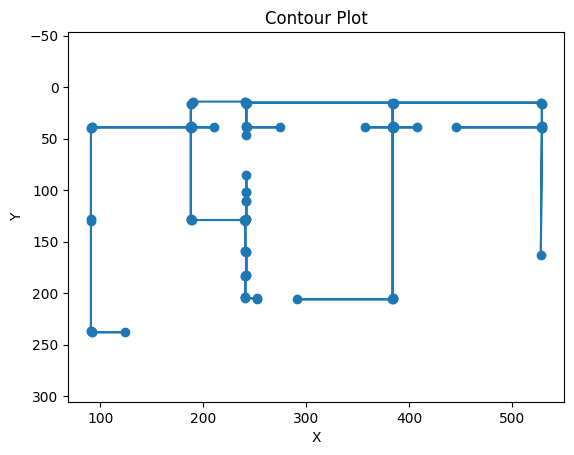

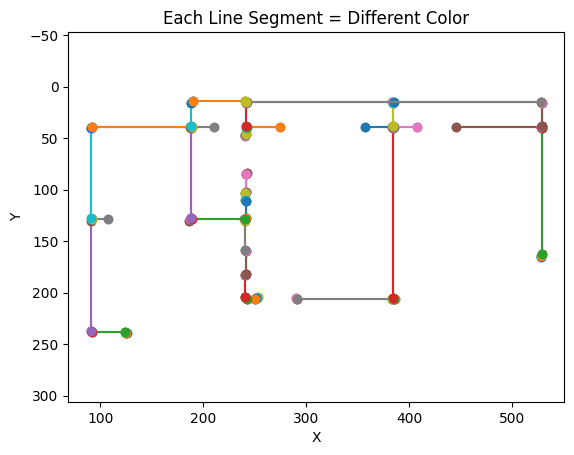

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# # Given contour
# contour = np.array([[[190, 14]], [[188, 16]], [[188, 38]], [[187, 39]], [[92, 39]], [[91, 40]], [[91, 237]], [[92, 238]], [[124, 238]], [[125, 239]], [[126, 239]], [[125, 239]], [[124, 238]], [[92, 238]], [[91, 237]], [[91, 130]], [[92, 129]], [[108, 129]], [[92, 129]], [[91, 128]], [[91, 40]], [[92, 39]], [[187, 39]], [[188, 40]], [[188, 128]], [[186, 130]], [[187, 129]], [[240, 129]], [[241, 130]], [[241, 159]], [[242, 160]], [[242, 182]], [[241, 183]], [[241, 204]], [[243, 206]], [[250, 206]], [[251, 205]], [[252, 205]], [[253, 204]], [[252, 205]], [[251, 205]], [[250, 206]], [[243, 206]], [[241, 204]], [[241, 183]], [[242, 182]], [[242, 160]], [[241, 159]], [[241, 129]], [[242, 128]], [[242, 111]], [[241, 110]], [[241, 103]], [[242, 102]], [[242, 85]], [[243, 84]], [[242, 85]], [[242, 102]], [[241, 103]], [[241, 110]], [[242, 111]], [[242, 128]], [[241, 129]], [[189, 129]], [[188, 128]], [[188, 40]], [[189, 39]], [[211, 39]], [[189, 39]], [[188, 38]], [[188, 16]], [[190, 14]], [[241, 14]], [[242, 15]], [[242, 46]], [[241, 47]], [[241, 48]], [[241, 47]], [[242, 46]], [[242, 40]], [[243, 39]], [[275, 39]], [[243, 39]], [[242, 38]], [[242, 16]], [[243, 15]], [[383, 15]], [[384, 16]], [[384, 38]], [[383, 39]], [[357, 39]], [[383, 39]], [[384, 40]], [[384, 205]], [[383, 206]], [[291, 206]], [[290, 205]], [[291, 206]], [[383, 206]], [[384, 205]], [[385, 206]], [[386, 206]], [[385, 206]], [[384, 205]], [[384, 40]], [[385, 39]], [[408, 39]], [[385, 39]], [[384, 38]], [[384, 16]], [[385, 15]], [[528, 15]], [[529, 16]], [[529, 38]], [[528, 39]], [[446, 39]], [[528, 39]], [[529, 40]], [[529, 163]], [[528, 164]], [[528, 165]], [[528, 164]], [[529, 163]], [[529, 40]], [[528, 39]], [[529, 38]], [[529, 16]], [[528, 15]], [[242, 15]], [[241, 14]]], dtype=np.int32)

result = merge_lines_with_local_mode(cont, min_segment_length=3, tolerance=10,y_jump_threshold=15)
print('➡ result:', len(result))
result = result.reshape(-1, 2)

contour = np.array(data['contours'][7], dtype=np.int32)

# Remove extra dimension -> (N, 2)
poin = result
#con#tour.reshape(-1, 2)

x = poin[:, 0]

y = poin[:, 1]

plt.figure()
plt.plot(x, y, '-o')   # line + poin
plt.gca().invert_yaxis()  # important for image coordinates
plt.axis('equal')
plt.title("Contour Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# ###################
# import numpy as np
# import matplotlib.pyplot as plt

point = contour.reshape(-1, 2)

plt.figure()

for i in range(len(point) - 1):
    x = [point[i, 0], point[i + 1, 0]]
    y = [point[i, 1], point[i + 1, 1]]
    plt.plot(x, y, marker='o')  # matplotlib auto-assigns color

plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Each Line Segment = Different Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [172]:
cont = data['contours'][7]#[42:67]
data  = np.array(data['contours'][0], dtype=np.int32)

In [202]:
n_data = []
for i in range(len(data['contours'])):
    cont = data['contours'][i]
    cont  = np.array(cont, dtype=np.int32)
    result = merge_lines_with_local_mode(cont, min_segment_length=3, tolerance=2,y_jump_threshold=15)
    n_data.append(result.reshape(-1, 2))

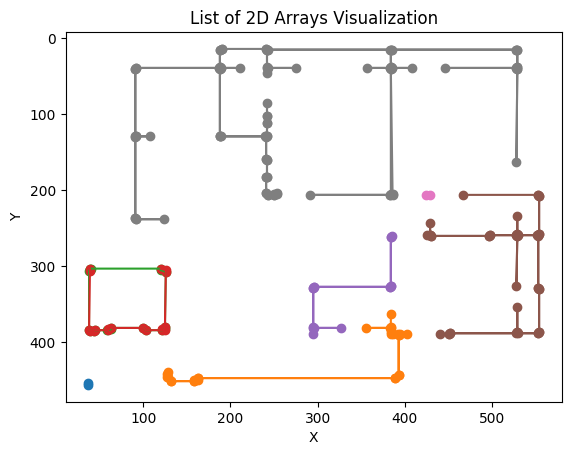

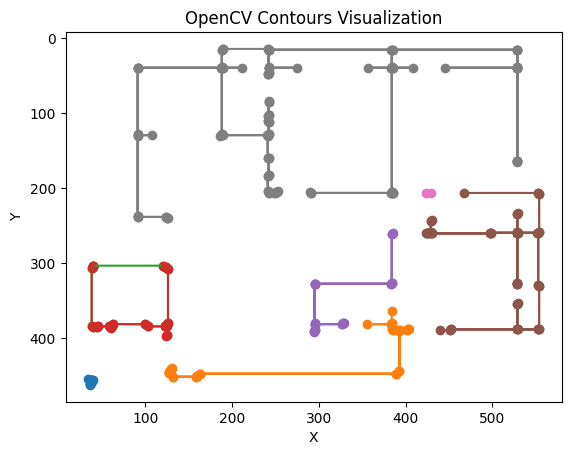

In [203]:
plt.figure()

for arr in n_data:
    x = arr[:, 0]
    y = arr[:, 1]
    
    plt.scatter(x, y)      # plot points
    plt.plot(x, y)         # connect them in order

plt.gca().invert_yaxis()   # useful if these are image coordinates
plt.title("List of 2D Arrays Visualization")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

# Suppose this is your contour list
contours = data['contours']   # list of contours

plt.figure()

for contour in contours:
    contour = np.array(contour)
    
    # reshape from (N,1,2) → (N,2)
    points = contour.reshape(-1, 2)
    
    x = points[:, 0]
    y = points[:, 1]
    
    plt.plot(x, y)       # connect contour
    plt.scatter(x, y)    # show points

plt.gca().invert_yaxis()  # for image coordinate system
plt.title("OpenCV Contours Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
for i in range(len(n_data)):

    poin = n_data[i]
    #con#tour.reshape(-1, 2)

    x = poin[:, 0]

    y = poin[:, 1]

    plt.figure()
    plt.plot(x, y, '-o')   # line + poin
    plt.gca().invert_yaxis()  # important for image coordinates
    plt.axis('equal')
    plt.title("Contour Plot")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

In [206]:
len(n_data[7])

102

In [207]:
!pip install -U transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 15.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.2/507.2 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.3/553.3 KB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 KB 20.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.8
    Uninstalling click-8.1.8:
      Successfully uninstalled click-8.1.8
  Attempting uninstall: typer
    Found existing installation: typer 0.14.0
    Uninstalling typer-0.14.0:
      Successfully uninstalled typer-0.14.0
  Attempting uninstall:

In [4]:
# Load model directly
from transformers import AutoModelForImageSegmentation
model = AutoModelForImageSegmentation.from_pretrained("briaai/RMBG-1.4", trust_remote_code=True, dtype="auto")

ModuleNotFoundError: No module named 'transformers'

In [2]:
!pip show transformers

Name: transformers
Version: 5.2.0
Summary: Transformers: the model-definition framework for state-of-the-art machine learning models in text, vision, audio, and multimodal models, for both inference and training.
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /home/logicrays/.local/lib/python3.10/site-packages
Requires: huggingface-hub, numpy, packaging, pyyaml, regex, safetensors, tokenizers, tqdm, typer-slim
Required-by: 


In [2]:
import cv2
import numpy as np

# Image path
image_path = "/home/logicrays/Documents/logicrays_projects/car_dent/car_image/1.jpg"

# Read image
img = cv2.imread(image_path)

# Your detections
tire_detections = [
    {'label': 'tire_detected', 'confidence': 0.65, 'bbox': [np.uint16(696), np.uint16(324), np.uint16(904), np.uint16(532)], 'excluded': True},
    {'label': 'tire_detected', 'confidence': 0.65, 'bbox': [np.uint16(912), np.uint16(462), np.uint16(1016), np.uint16(566)], 'excluded': True}
]

for det in tire_detections:
    x1, y1, x2, y2 = map(int, det['bbox'])

    # Color: red if excluded, green otherwise
    color = (0, 0, 255) if det['excluded'] else (0, 255, 0)

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)

    # Put label
    label_text = f"{det['label']} {det['confidence']:.2f}"
    cv2.putText(img, label_text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Save output
output_path = "tire_boxes_output.jpg"
cv2.imwrite(output_path, img)

print("Saved:", output_path)

Saved: tire_boxes_output.jpg


In [ ]:
[
    {'label': 'tire_detected', 'confidence': 0.65, 'bbox': [np.uint16(696), np.uint16(324), np.uint16(904), np.uint16(532)], 'excluded': True}, 
{'label': 'tire_detected', 'confidence': 0.65, 'bbox': [np.uint16(912), np.uint16(462), np.uint16(1016), np.uint16(566)], 'excluded': True}]

In [1]:
import pyvista as pv

# Load the STL file
mesh = pv.read('/home/logicrays/Desktop/botpress/files/shapy/output_17_walls.stl')

# Create a plotter and add the mesh
plotter = pv.Plotter()
plotter.add_mesh(mesh, color='silver', show_edges=True)

# Set a background color and show
plotter.set_background("white")
plotter.show()

ModuleNotFoundError: No module named 'pyvista'

In [ ]:
!pip install pyvista

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.6/145.6 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 KB 2.5 MB/s eta 0:00:0031m16.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.2/633.2 KB 5.1 MB/s eta 0:00:000:00:010:00:01
